# Описание проекта.

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных.

- **Name** — название игры  
- **Platform** — платформа  
- **Year_of_Release** — год выпуска  
- **Genre** — жанр игры  
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий)  
- **EU_sales** — продажи в Европе (миллионы проданных копий)  
- **JP_sales** — продажи в Японии (миллионы проданных копий)  
- **Other_sales** — продажи в других странах (миллионы проданных копий)  
- **Critic_Score** — оценка критиков (максимум 100)  
- **User_Score** — оценка пользователей (максимум 10)  
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

<h1>Оглавление.<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Открываем-файл-с-данными-и-изучаем-общую-информацию." data-toc-modified-id="Открываем-файл-с-данными-и-изучаем-общую-информацию.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открываем файл с данными и изучаем общую информацию.</a></span></li><li><span><a href="#Предобработка-данных." data-toc-modified-id="Предобработка-данных.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных.</a></span></li><li><span><a href="#Исследовательский-анализ." data-toc-modified-id="Исследовательский-анализ.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ.</a></span></li><li><span><a href="#Составьте-портрет-пользователя-каждого-региона." data-toc-modified-id="Составьте-портрет-пользователя-каждого-региона.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Составьте портрет пользователя каждого региона.</a></span></li><li><span><a href="#Проверьте-гипотезы." data-toc-modified-id="Проверьте-гипотезы.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверьте гипотезы.</a></span></li><li><span><a href="#Общий-вывод." data-toc-modified-id="Общий-вывод.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод.</a></span></li></ul></div>

## Открываем файл с данными и изучаем общую информацию.

In [1]:
# Импортируем необходимые библиотеки.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# Открываем датафрейм.
df = pd.read_csv('/datasets/games.csv')

display(df.head(10))
display(df.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Проверим наличие явных дубликатов в данных.

In [3]:
df.duplicated().sum()

0

Проверим наличие пропусков в данных.

In [4]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Вывод:**

Названия столбцов необходимо привести к нижнему регистру. В данных отсутствуют явные дубликаты, в части столбцов имеются пропущенные значения, тип некоторых столбцов необходимо изменить, займёмся этим в следующем этапе проекта.

## Предобработка данных.

2.1 Приведем названия столбцов к нижнему регистру.

In [5]:
print(df.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
# Поиск неявных дубликатов
df[df[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [8]:
# Удаление дублирующихся строк
df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first', inplace=True)

# Проверка
df[df[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


2.2 Изменение типов данных.

Посмотрим, какие данные находятся в столбце user_score, непонятно, почему указан тип object.

In [9]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

tbd (To Be Determined) - рейтинг пока не определён, по сути, то же самое, что и NaN, заменим.

In [10]:
# Заменяем tbd на NaN.
df['user_score'] = df['user_score'].replace('tbd', np.NaN)

# Поменяем тип данных в столбце user_score на float.
df['user_score'] = df['user_score'].astype(float)
df['user_score'].dtype

dtype('float64')

Изменим тип данных в столбце year_of_release на целочисленный, так как в столбце указан год выпуска игры.

In [11]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

2.2 Работа с пропусками.

Ещё раз посмотрим, в каких столбцах есть пропуски.

In [12]:
df.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating             6765
dtype: int64

In [13]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


Пропуски в столбце name можно просто удалить, так как почти все данные отсутствуют.

In [14]:
df.dropna(subset=['name'], inplace=True)
df['name'].isna().sum()

0

Пропущенные значения в столбце year_of_release заполнить не получится, заменим их на -1, чтобы учитывать количество отсутствующих данных в дальнейшей работе.

In [15]:
df.dropna(subset=['year_of_release'], inplace=True)
df['year_of_release'].isna().sum()

0

Аналогично, как и в столбце с годом выпуска игры, заменил пропуски в столбцах critic_score и user_score	на -1.

In [16]:
df.loc[df['critic_score'].isna(), 'critic_score'] = -1
df.loc[df['user_score'].isna(), 'user_score'] = -1

df['user_score'].isna().sum()
df['critic_score'].isna().sum()

0

Пропуски в столбце rating можно заменить на not_defined (не определён).

In [17]:
df.loc[df['rating'].isna(), 'rating'] = 'not_defined'
df['rating'].isna().sum()

0

Проверяем наличие пропусков после обработки.

In [18]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

2.3 Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [19]:
df['sum_total'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,not_defined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,not_defined,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,not_defined,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,not_defined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,not_defined,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,not_defined,0.01


**Вывод**:

1. Названия столбцов в датафрейме были приведены к нижнему регистру.
2. В столбце user_score значения tbd заменены на np.NaN;
3. Работа с пропусками:
- Пропуски в столбце name были удалены, в связи с отсутствием данным в этих строках.
- Пропуски в столбце year_of_release были заменены на -1, чтобы у нас была возможность не включать их в исследуемый диапозон.
- В столбцах critic_score и user_score значения np.NaN заменены на -1, логика аналогична столбцу year_of_release.
- Пропуски в столбце rating были заменены на значение "not_defined", что говорит о том, что рейтинг не определён.

Пропущенные значения в этих данных могли появиться в следствие ошибок, а в столбцах с рейтингом - в следствии того, что игры просто не оценивались.

4. Неявных и явных дубликатов в данных не обнаружено.
5. Изменение типов данных:
- Столбец user_score приведен к числовому типу float64, так как он содержит дробные числа. 
- Столбец critic_score приведен к числовому типу int, так как данные в нём целочисленные. 
- Cтолбец year_of_release приведен к числовому типу int, так как данные в нём целочисленные.
6. Посчитаны суммарные продажи во всех регионах и записаны в столбец sum_total.


## Исследовательский анализ.

3.1 Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

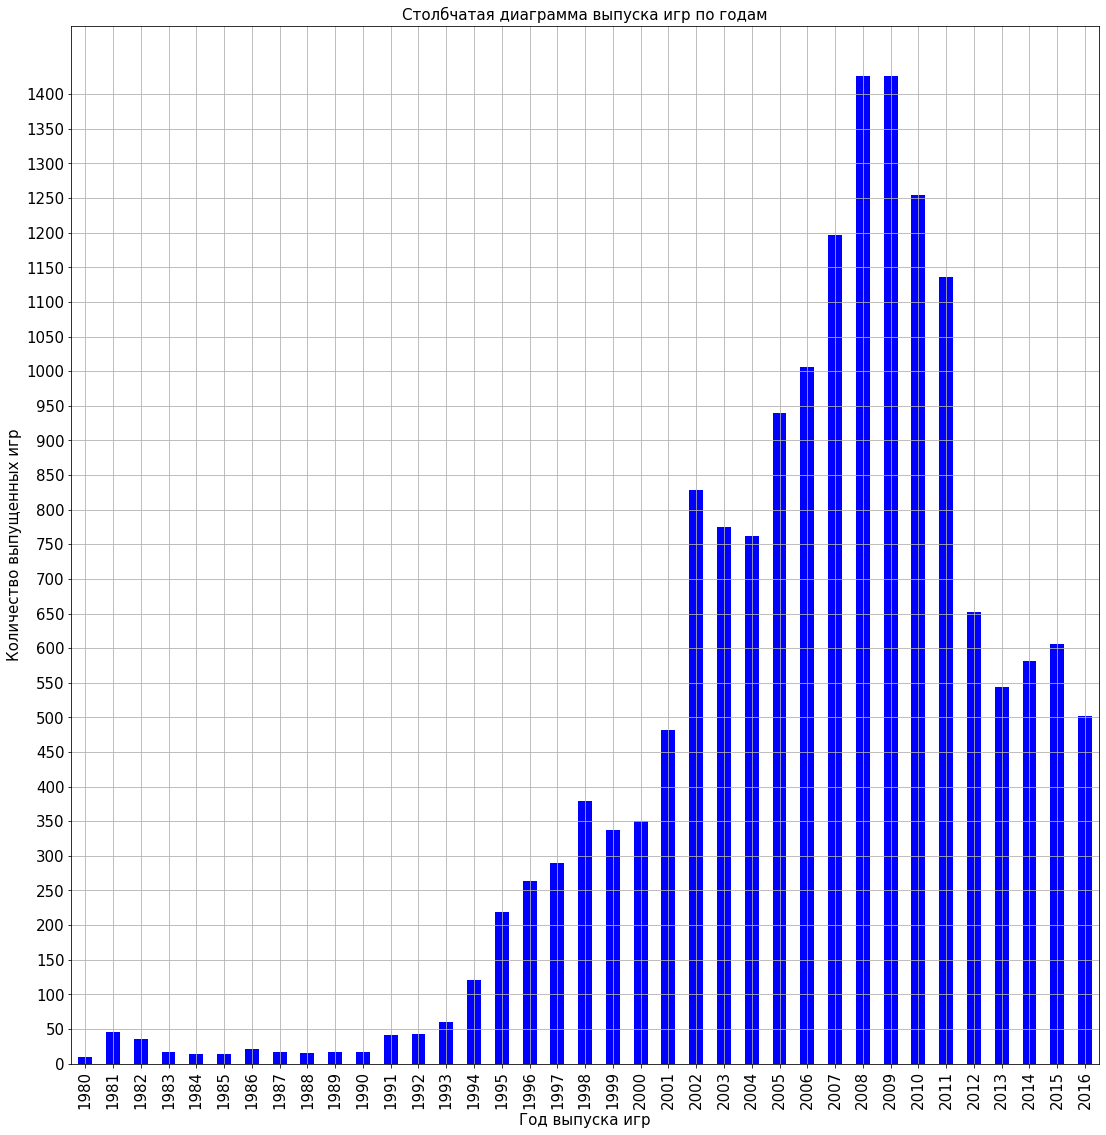

In [20]:
fig, ax = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(15, 15)
fig.tight_layout()
f_size = 15

df_group_by_year = df.pivot_table(index=['year_of_release'], values='name',aggfunc='count')
df_group_by_year.plot(
                       y='name',
                       kind='bar',
                       ax=ax,
                       legend = False,
                       grid = True,
                       color = 'blue')

ax.yaxis.set(ticks=range(0,1450,50));
ax.set_title('Столбчатая диаграмма выпуска игр по годам')
ax.set_xlabel('Год выпуска игр')
ax.set_ylabel('Количество выпущенных игр')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(f_size)

**Вывод:**

Данных с 1980 по 1992 год совсем мало, количество пропущенных данных соизмеримо с количеством игр за эти года. 

Далее данных уже достаточно много, вероятно это связано с развитием операционных систем. 2005 - 2011 год - пик популярности в мире видеоигр.

3.2 Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

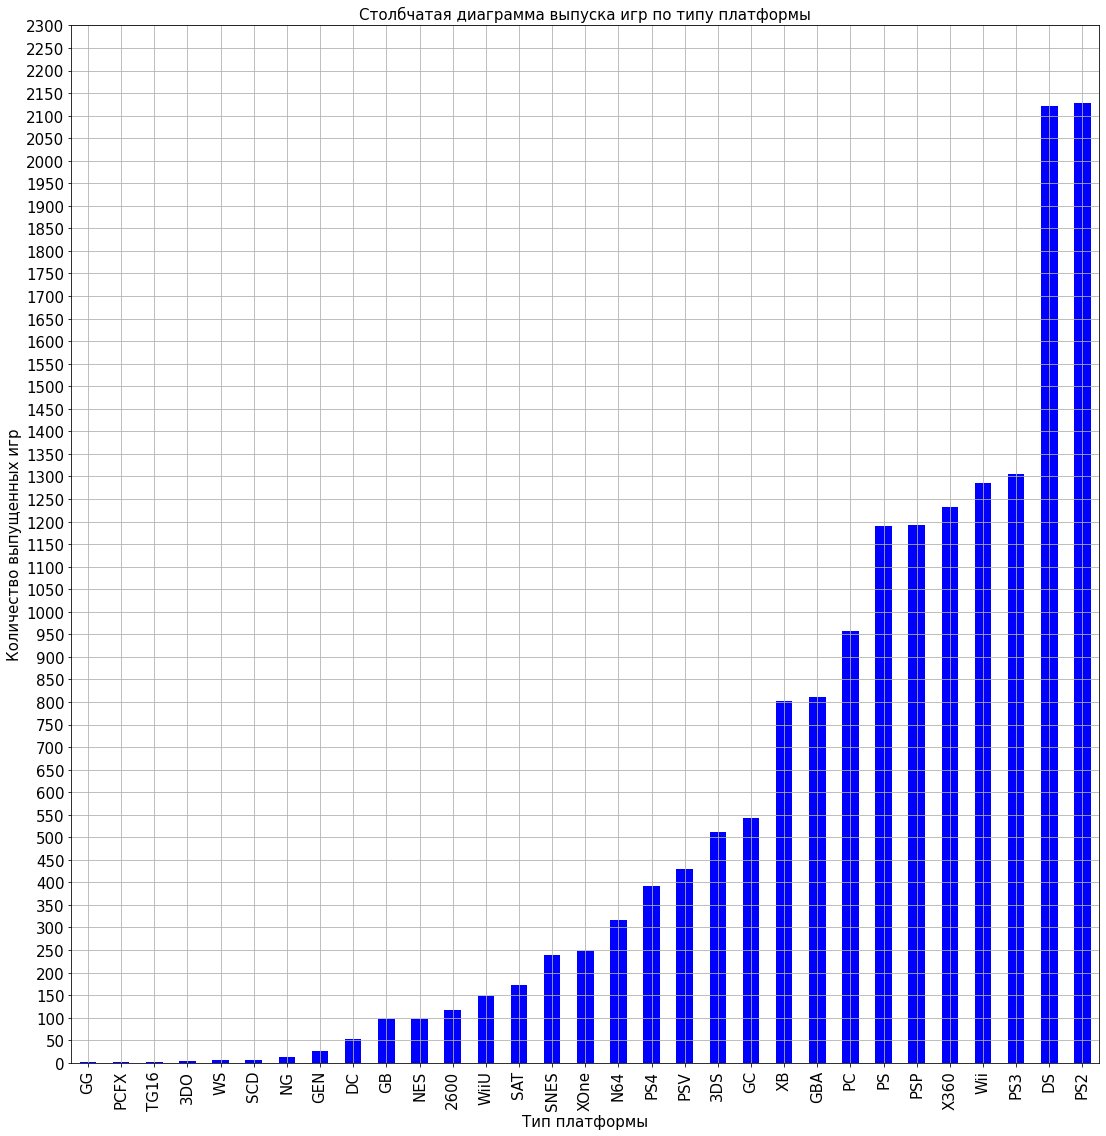

In [21]:
fig, ax = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(15, 15)
fig.tight_layout()
f_size = 15

df_group_by_platform_count = df.pivot_table(index=['platform'], values='name',aggfunc='count')
df_group_by_platform_count = df_group_by_platform_count.sort_values('name', ascending=True)

df_group_by_platform_count.plot(
                       y='name',
                       kind='bar',
                       ax=ax,
                       legend = False,
                       grid = True,
                       color = 'blue')

ax.yaxis.set(ticks=range(0,2350,50));
ax.set_title('Столбчатая диаграмма выпуска игр по типу платформы')
ax.set_xlabel('Тип платформы')
ax.set_ylabel('Количество выпущенных игр')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(f_size)

По платформам 3DO, GEN, GG, PCFX, NG, SCD, TG16, WS данные практически отсутствуют - их мы анализировать не будем.
Самые популярные платформы: DS, PS, PS2, PS3, Wii, X360 и XB. Для DS и PS выпущено более 2000 игр.

Рассмотрим сумарные продажи по каждой из платформ:

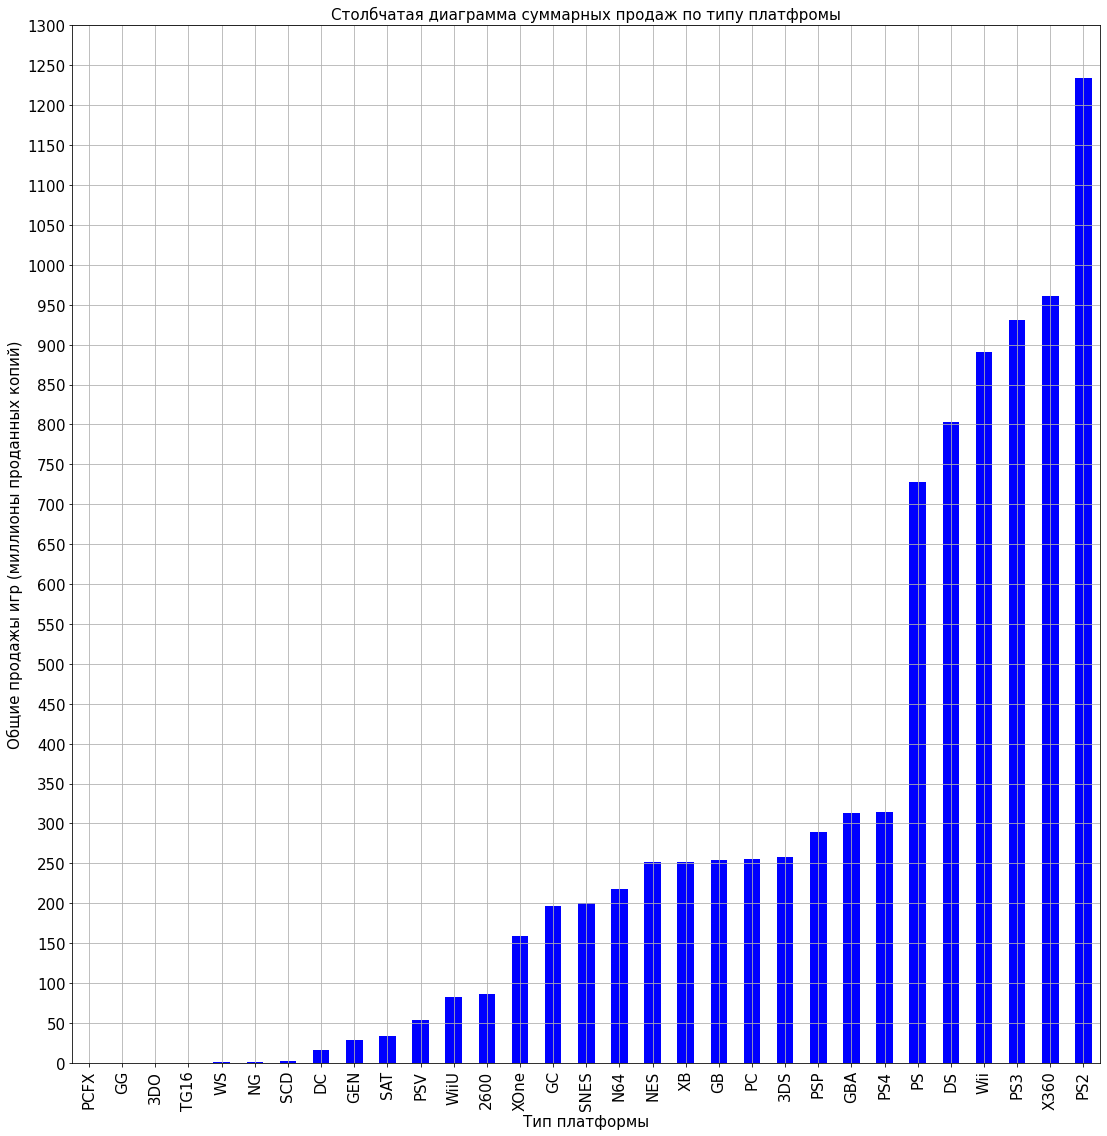

In [22]:
fig, ax = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(15, 15)
fig.tight_layout()
f_size = 15

df_group_by_platform_sum_sales = df.pivot_table(index=['platform'], values='sum_total',aggfunc='sum')
df_group_by_platform_sum_sales = df_group_by_platform_sum_sales.sort_values('sum_total')
df_group_by_platform_sum_sales.plot(
                       y='sum_total',
                       kind='bar',
                       ax=ax,
                       legend = False,
                       grid = True,
                       color='blue')

ax.yaxis.set(ticks=range(0,1350,50));
ax.set_title('Столбчатая диаграмма суммарных продаж по типу платфромы')
ax.set_xlabel('Тип платформы')
ax.set_ylabel('Общие продажы игр (миллионы проданных копий)')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(f_size)

Рассмотрим список 10-ти самых популярных платформ.

In [23]:
top_platform = df_group_by_platform_sum_sales.sort_values(by='sum_total', ascending=False)[:10].index
top_platform

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'], dtype='object', name='platform')

Нужно понять среднее время жизни платформы, время за которое платформа обычно достигает пика и время за которое платформа уходит с рынка.

3DS   rise=  2.5, live=  5, fall=  2.5;
DS    rise=  4.5, live=  9, fall=  4.5;
GBA   rise=  3.5, live=  7, fall=  3.5;
PS    rise=  4.5, live=  9, fall=  4.5;
PS2   rise=  5.5, live= 11, fall=  5.5;
PS3   rise=  5.0, live= 10, fall=  5.0;
PS4   rise=  1.5, live=  3, fall=  1.5;
PSP   rise=  5.5, live= 11, fall=  5.5;
Wii   rise=  5.0, live= 10, fall=  5.0;
X360  rise=  5.5, live= 11, fall=  5.5;


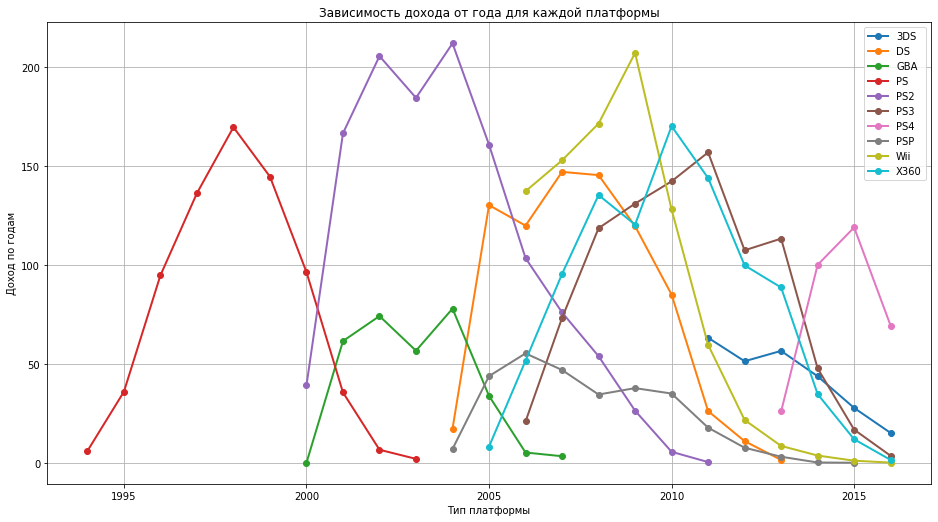

,rise,live,fall
count,10.000000,10.00000,10.000000
mean,4.300000,8.60000,4.300000
std,1.378405,2.75681,1.378405
min,1.500000,3.00000,1.500000
25%,3.750000,7.50000,3.750000
50%,4.750000,9.50000,4.750000
75%,5.375000,10.75000,5.375000
max,5.500000,11.00000,5.500000


In [24]:
df.loc[(df['platform'] == 'DS') & (df['year_of_release'] < 2004), 'year_of_release'] = -1

fig, ax = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(13, 7)
fig.tight_layout()

groupby_platform_and_year = (
    df
    .query('platform in @top_platform and year_of_release > 0')
    .groupby(by=['platform','year_of_release'])['sum_total'].sum()
    .reset_index()
)

stat_time_live = {'platform': [], 'rise': [], 'live': [], 'fall': []}
for name, platform in groupby_platform_and_year.groupby(by='platform'):
    platform.plot(
        ax=ax,
        kind='line',
        x='year_of_release',
        y='sum_total',
        style='-o',
        linewidth = 2.0,
        grid=True,
        label=name)
    stat_time_live['platform'].append(name)
    stat_time_live['rise'].append(np.median(platform['year_of_release']) - np.min(platform['year_of_release']))
    stat_time_live['live'].append(np.max(platform['year_of_release']) - np.min(platform['year_of_release']))
    stat_time_live['fall'].append(np.max(platform['year_of_release']) -np.median(platform['year_of_release']))
    print('{0:5} rise={1:5}, live={2:3}, fall={3:5};'
          .format(name, stat_time_live['rise'][-1], stat_time_live['live'][-1], stat_time_live['fall'][-1]))

ax.set_xlabel('Тип платформы')
ax.set_ylabel('Доход по годам')
ax.set_title('Зависимость дохода от года для каждой платформы')

plt.show()

pd.DataFrame(stat_time_live).describe()

**Вывод:**

В среднем за 5 лет на рынке появляются новые платформы, живут они около 10 лет, а исчезают ещё 5 лет. Некоторые платформы живут очень долго, например DS и PS, а PS4 только зарождается.

4.3 Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Данные необходио выбрать за последние 5 лет, чтобы делать анализ только по актуальным платформам. Рассмотрим период с 2012 по 2016 год.

In [25]:
df_actuality = df[df['year_of_release'] > 2011]
df_actuality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2885 non-null   object 
 1   platform         2885 non-null   object 
 2   year_of_release  2885 non-null   Int64  
 3   genre            2885 non-null   object 
 4   na_sales         2885 non-null   float64
 5   eu_sales         2885 non-null   float64
 6   jp_sales         2885 non-null   float64
 7   other_sales      2885 non-null   float64
 8   critic_score     2885 non-null   float64
 9   user_score       2885 non-null   float64
 10  rating           2885 non-null   object 
 11  sum_total        2885 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 295.8+ KB


3DS   rise=  2.0, live=  4, fall=  2.0;
DS    rise=  0.5, live=  1, fall=  0.5;
PC    rise=  2.0, live=  4, fall=  2.0;
PS3   rise=  2.0, live=  4, fall=  2.0;
PS4   rise=  1.5, live=  3, fall=  1.5;
PSP   rise=  1.5, live=  3, fall=  1.5;
PSV   rise=  2.0, live=  4, fall=  2.0;
Wii   rise=  2.0, live=  4, fall=  2.0;
WiiU  rise=  2.0, live=  4, fall=  2.0;
X360  rise=  2.0, live=  4, fall=  2.0;
XOne  rise=  1.5, live=  3, fall=  1.5;


Text(0.5, 1.0, 'Зависимость дохода от года для каждой платформы')

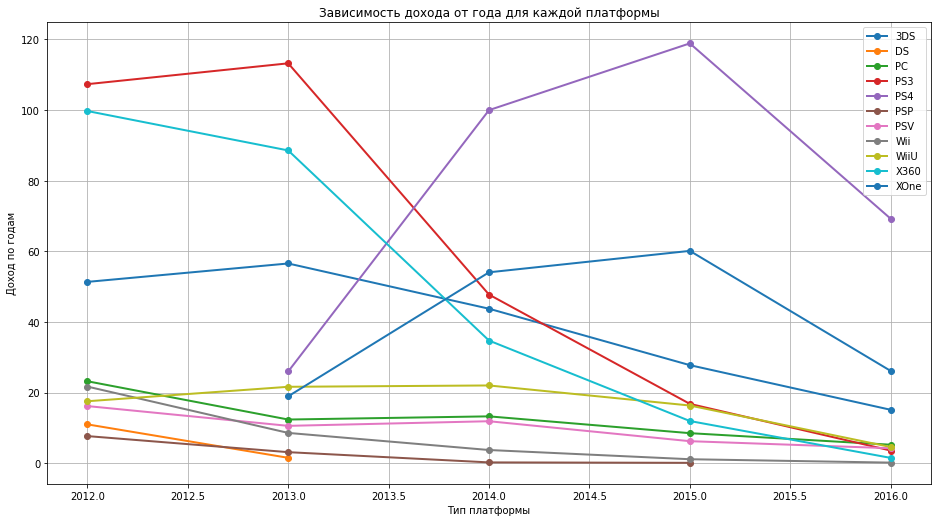

In [26]:
fig, ax = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(13, 7)
fig.tight_layout()

groupby_platform_and_year = (
    df_actuality
    .groupby(by=['platform','year_of_release'])['sum_total'].sum()
    .reset_index()
)

stat_time_live = {'platform': [], 'rise': [], 'live': [], 'fall': []}
for name, platform in groupby_platform_and_year.groupby(by='platform'):
    platform.plot(
        ax=ax,
        kind='line',
        x='year_of_release',
        y='sum_total',
        style='-o',
        linewidth = 2.0,
        grid=True,
        label=name)
    stat_time_live['platform'].append(name)
    stat_time_live['rise'].append(np.median(platform['year_of_release']) - np.min(platform['year_of_release']))
    stat_time_live['live'].append(np.max(platform['year_of_release']) - np.min(platform['year_of_release']))
    stat_time_live['fall'].append(np.max(platform['year_of_release']) -np.median(platform['year_of_release']))
    print('{0:5} rise={1:5}, live={2:3}, fall={3:5};'
          .format(name, stat_time_live['rise'][-1], stat_time_live['live'][-1], stat_time_live['fall'][-1]))

ax.set_xlabel('Тип платформы')
ax.set_ylabel('Доход по годам')
ax.set_title('Зависимость дохода от года для каждой платформы')

Большинство платформ к 2016 году уже заканчивают своё существование на рынке. Платформы, которые появились в 2013 году: XOne и PS4, а также платформа 3DS находятся в топе.

Уровень дохода PC особо не меняется с течением времени.

4.4 Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

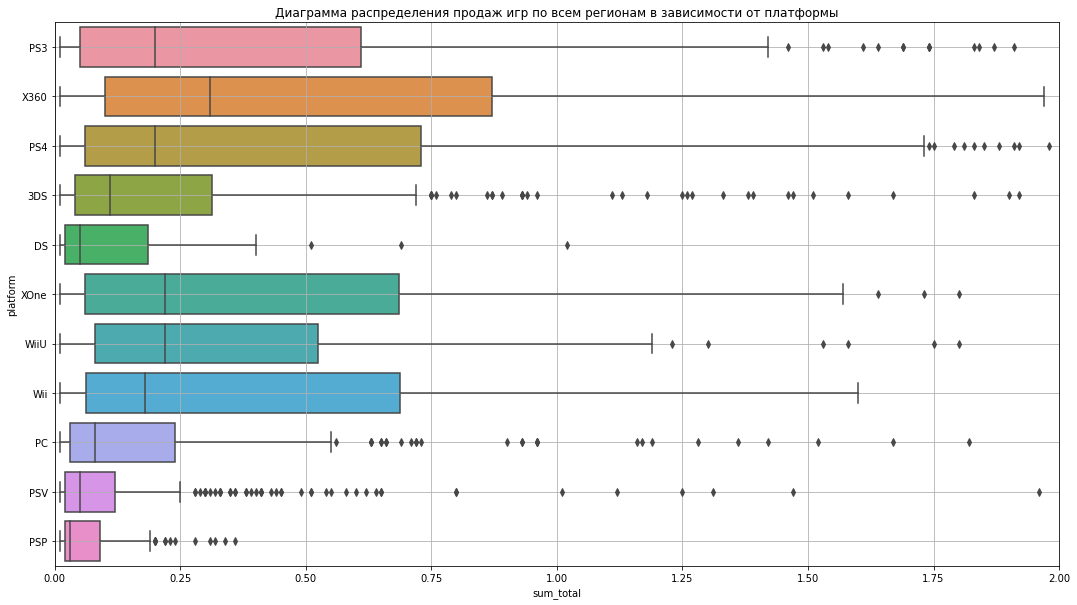

          count      mean       std   min     25%   50%     75%    max
platform                                                              
3DS       396.0  0.491439  1.387161  0.01  0.0400  0.11  0.3125  14.60
DS         31.0  0.404839  1.439245  0.01  0.0200  0.05  0.1850   8.06
PC        250.0  0.250600  0.494640  0.01  0.0300  0.08  0.2400   5.14
PS3       492.0  0.586951  1.464113  0.01  0.0500  0.20  0.6100  21.05
PS4       392.0  0.801378  1.609456  0.01  0.0600  0.20  0.7300  14.63
PSP       173.0  0.064682  0.071296  0.01  0.0200  0.03  0.0900   0.36
PSV       411.0  0.119659  0.203011  0.01  0.0200  0.05  0.1200   1.96
Wii        54.0  0.655000  1.165447  0.01  0.0625  0.18  0.6875   6.76
WiiU      147.0  0.559116  1.058836  0.01  0.0800  0.22  0.5250   7.09
X360      292.0  0.810068  1.712069  0.01  0.1000  0.31  0.8700  16.27
XOne      247.0  0.645020  1.036139  0.01  0.0600  0.22  0.6850   7.39


In [27]:
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(y="platform", x="sum_total", data=df_actuality, orient="h", ax=ax)
ax.grid()
ax.set_xlim(0,2)
ax.set_title('Диаграмма распределения продаж игр по всем регионам в зависимости от платформы')
plt.show()

# Вывод результатов describe()
describe_results = df_actuality.groupby('platform')['sum_total'].describe()
print(describe_results)

**Выводы:**

Самыми "продаваемыми" платформами являются X360, PS4, X360, XOne.  
Игры на PSP, PSV и DS и PC плохо продаются в рассматриваваемом периоде < 250 тыс. копий.  

Лидер - X360, более 750 тыс. копий.

Анализируя данные по популярным платформам, таким как PS3, PS4, X360 и XOne, можно сделать следующие наблюдения:

Распределение продаж игр на платформах PS3, PS4, X360 и XOne имеет значительную вариативность. Среднее значение продаж на этих платформах составляет от 0.59 миллиона до 0.81 миллиона копий.

На платформах PS3, X360 и PS4 наблюдаются значительные выбросы, представленные очень популярными играми с продажами до 21.05 миллиона копий. Это указывает на наличие нескольких игр, которые имели большой успех и привлекли большое количество покупателей.

Платформа XOne также имеет несколько выбросов, хотя они не так ярко выражены, как на платформах PS3, X360 и PS4. Это указывает на наличие нескольких популярных игр на данной платформе, которые привлекли внимание игрового сообщества.

Стандартное отклонение (std) на этих платформах указывает на разброс данных. Например, платформы X360 и PS4 имеют относительно высокие значения std (1.712 и 1.609 соответственно), что указывает на более широкий разброс продаж на этих платформах.

Исходя из этого, можно сделать вывод, что популярные платформы PS3, PS4, X360 и XOne имеют разнообразные распределения продаж игр, с наличием нескольких выбросов, представляющих собой особо популярные игры. 

4.5 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Мы рассмотрим платформу Х360, так как она является самой популярной. 

In [28]:
df_actuality_X360 = df_actuality[df_actuality['platform'] == 'X360']
df_actuality_X360.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 23 to 16654
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             292 non-null    object 
 1   platform         292 non-null    object 
 2   year_of_release  292 non-null    Int64  
 3   genre            292 non-null    object 
 4   na_sales         292 non-null    float64
 5   eu_sales         292 non-null    float64
 6   jp_sales         292 non-null    float64
 7   other_sales      292 non-null    float64
 8   critic_score     292 non-null    float64
 9   user_score       292 non-null    float64
 10  rating           292 non-null    object 
 11  sum_total        292 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 29.9+ KB


In [29]:
# Данные для расчёта полинома будут чистыми
x_filter = df_actuality_X360.query('user_score > 0')["sum_total"]
# Вычисляем коэффициенты полинома и создаём объект полинома
p1_user_score = np.poly1d(np.polyfit(x_filter,
                                     df_actuality_X360.query('user_score > 0')["user_score"], 1))
# Аппроксимированные значения
approx_user_score = p1_user_score(x_filter)

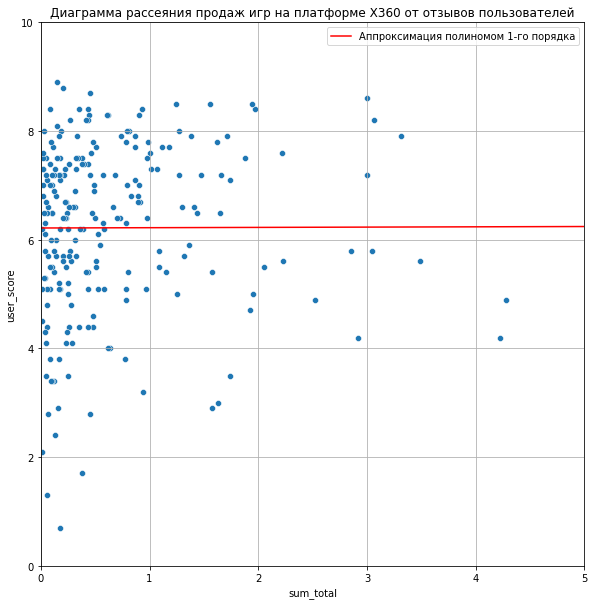

In [30]:
fig, ax = plt.subplots(figsize=(18, 10))
filtered_data = df_actuality[(df_actuality['platform'] == 'X360') & (df_actuality['user_score'] != -1)]
filtered_data = filtered_data.dropna(subset=['sum_total'])  # Отбросить строки с пропущенными значениями в 'sum_total'
sns.scatterplot(data=filtered_data, x="sum_total", y="user_score")
ax.grid()
ax.set_xlim(0, 5)
ax.set_ylim(0, 10)  # Опционально, для установки пределов оси Y
ax.set_aspect(1.0 / ax.get_data_ratio(), adjustable='box')
ax.set_title('Диаграмма рассеяния продаж игр на платформе X360 от отзывов пользователей')
ax.plot(x_filter, approx_user_score, '-r', label='Аппроксимация полиномом 1-го порядка')
ax.legend(loc='upper right')
pass



Красной линией на графике была отображена линейная аппроксимация данных, угол наклона 45 градусов - корреляция максимальна, при 0 градусах равна 0. Можно сделать вывод, что **связи между продажами и отзывами пользователей нет**.

Внизу есть точки в районе 0 - это пропущенные значения.

Рассмотрим связь между оценкой критиков и продажами игр.

In [31]:
# Данные для расчёта полинома будут чистыми
x_filter = df_actuality_X360.query('critic_score > 0')["sum_total"]
# Вычисляем коэффициенты полинома и создаём объект полинома
p1_critic_score = np.poly1d(np.polyfit(x_filter,
                                       df_actuality_X360.query('critic_score > 0')["critic_score"], 1))
# Аппроксимированные значения
approx_critic_score = p1_critic_score(x_filter)

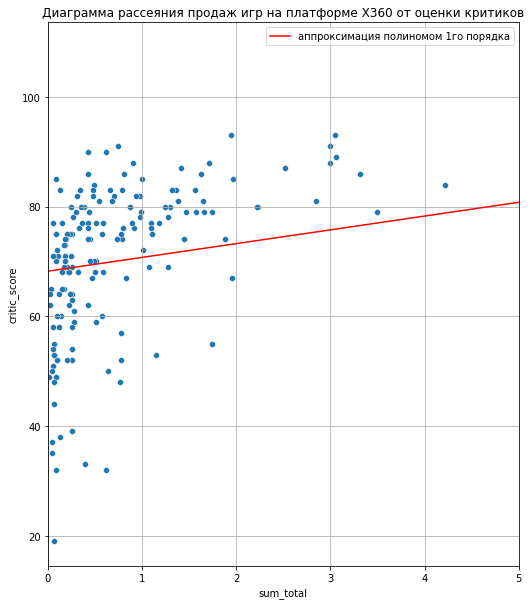

In [32]:
fig, ax = plt.subplots(figsize=(18,10))
sns.scatterplot(data=df_actuality[(df_actuality['platform'] == 'X360') & (df_actuality['critic_score'] != -1)], x="sum_total", y="critic_score")
ax.grid()
ax.set_xlim(0,5)
# Нужно чтобы оси графика были одинаковыми и не искажали преставление.
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
ax.set_title('Диаграмма рассеяния продаж игр на платформе X360 от оценки критиков')
ax.plot(x_filter, approx_critic_score, '-r', label='аппроксимация полиномом 1го порядка')
ax.legend(loc='upper right')
pass

In [33]:
# y = k*x + b
k, b = np.polyfit(x_filter,df_actuality_X360.query('critic_score > 0')["critic_score"], 1)
# rad => grad
np.arctan(k)*180/np.pi

68.2872527622836

Угол наклона прямой примерно 68 градусов, прослеживается линейная связь, необходимо проверить корреляцию.

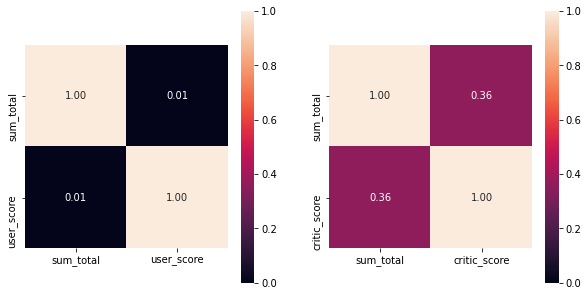

In [34]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.heatmap(df_actuality_X360.query('user_score > 0')[['sum_total', 'user_score']].corr(), ax=ax1, annot=True, fmt='.2f', vmin=0,vmax=1, square=True)

sns.heatmap(df_actuality_X360.query('critic_score > 0')[['sum_total', 'critic_score']].corr(), ax=ax2, annot=True, fmt='.2f', vmin=0,vmax=1, square=True)

plt.show()

**Вывод:**

Зависимости между продажами и отзывами пользователей нет, значение корреляции близко к 0. 
Зависимость между продажами и отзывами критиков слабая, корреляция 0.36.  

Выходит, что рецензии критиков могут повлиять на продажи игр.

4.5 Соотнесите выводы с продажами игр на других платформах.

Возьмём из актуальной базы топ 7 платформ, кроме X360

In [35]:
df_actuality_top7 = df_actuality.groupby(by=['platform'])['sum_total'].agg('sum').sort_values(ascending=False)[:7].drop('X360')
df_actuality_top7

platform
PS4     314.14
PS3     288.78
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
Name: sum_total, dtype: float64

Для удобства создадим отдельный датасет.

In [36]:
df_actuality_other = df_actuality[df_actuality['platform'].isin(df_actuality_top7.index)]
df_actuality_other.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1924 entries, 16 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1924 non-null   object 
 1   platform         1924 non-null   object 
 2   year_of_release  1924 non-null   Int64  
 3   genre            1924 non-null   object 
 4   na_sales         1924 non-null   float64
 5   eu_sales         1924 non-null   float64
 6   jp_sales         1924 non-null   float64
 7   other_sales      1924 non-null   float64
 8   critic_score     1924 non-null   float64
 9   user_score       1924 non-null   float64
 10  rating           1924 non-null   object 
 11  sum_total        1924 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 197.3+ KB


Построим графики диаграмм рассеяния для каждой платформы.

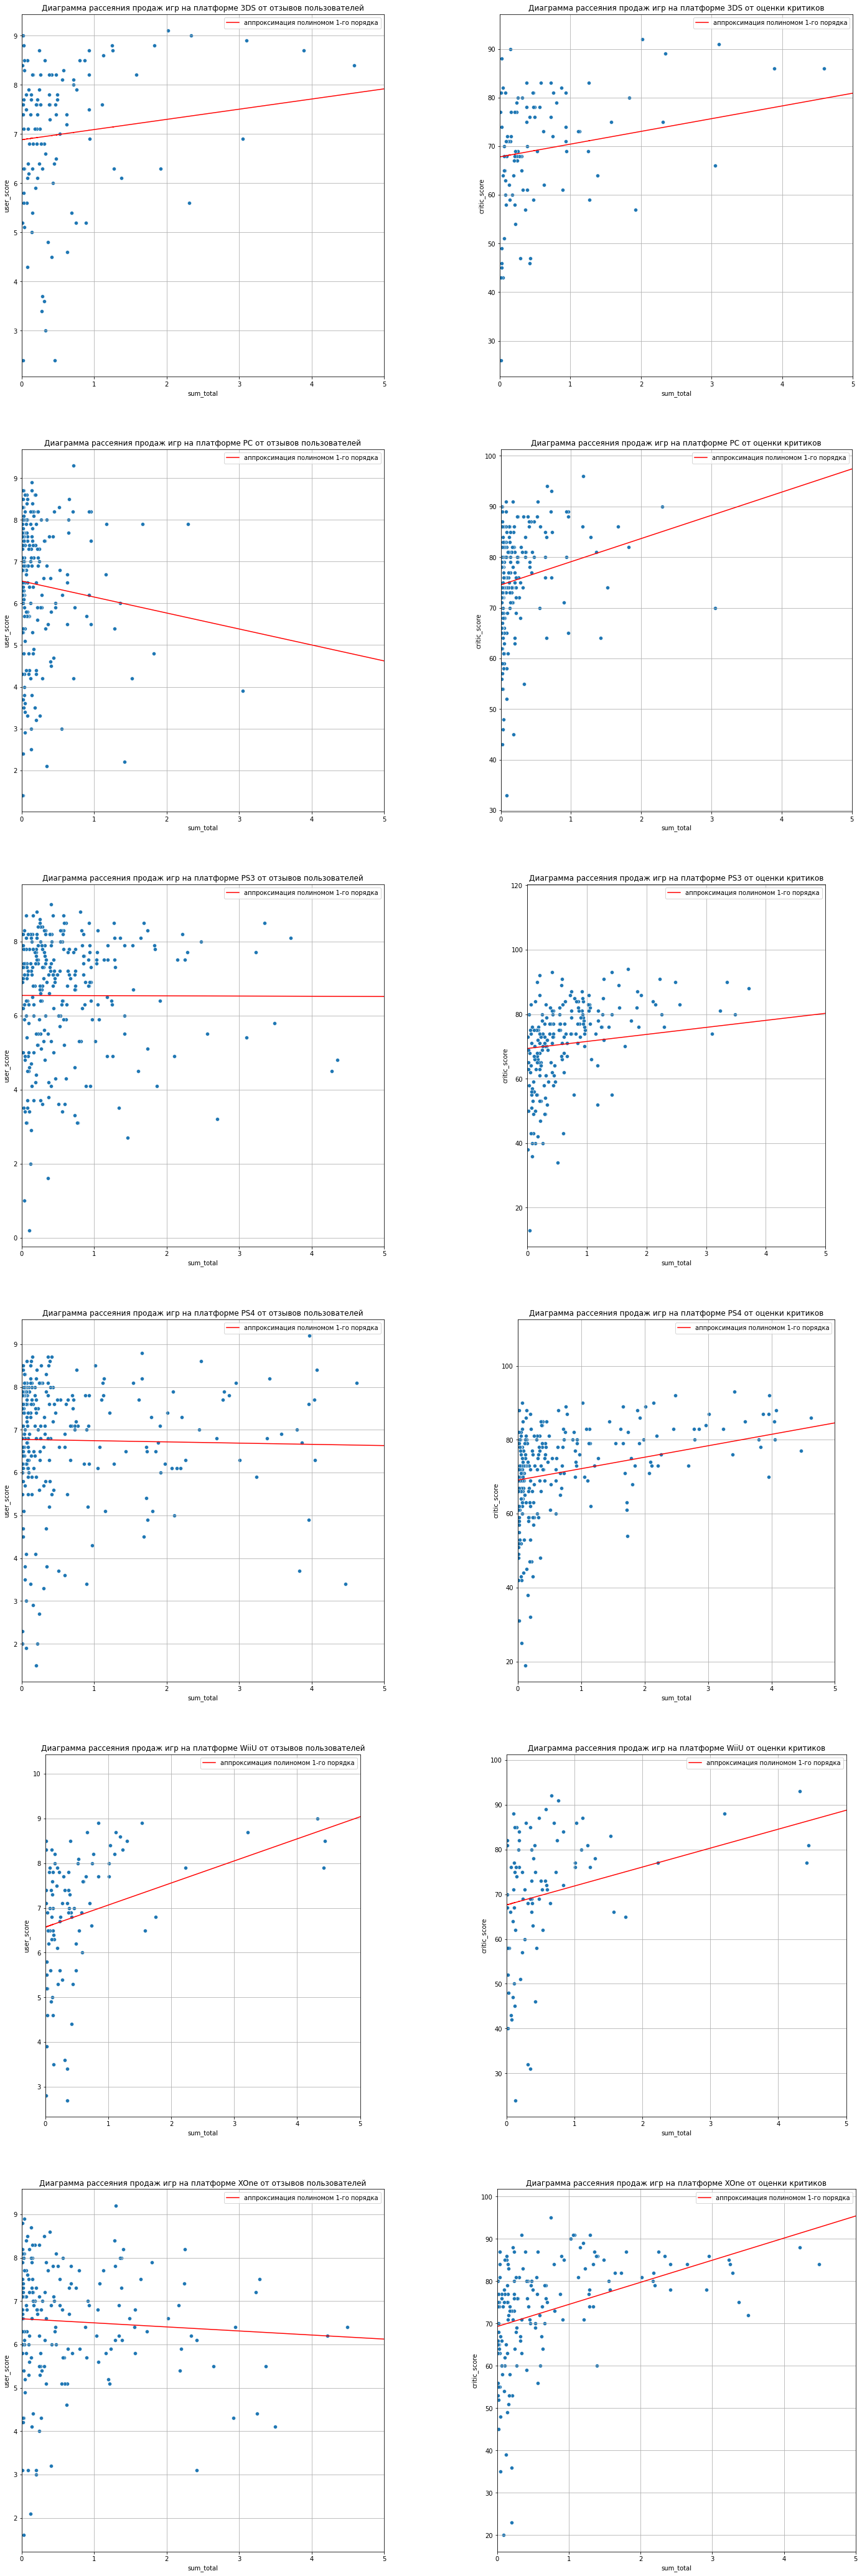

In [37]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(25, 25*3))

for ax, (name_platform, data_slice) in zip(axes[:, 0], df_actuality_other.groupby(by='platform')):
    filtered_data = data_slice[(data_slice['platform'] == name_platform) & (data_slice['user_score'] != -1) & (data_slice['sum_total'] >= 0)]
    x_filter = filtered_data["sum_total"]
    p1_user_score = np.poly1d(np.polyfit(x_filter, filtered_data["user_score"], 1))
    approx_user_score = p1_user_score(x_filter)

    sns.scatterplot(ax=ax, data=filtered_data, x="sum_total", y="user_score")
    ax.grid()
    ax.set_xlim(0, 5)
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    ax.set_title('Диаграмма рассеяния продаж игр на платформе ' + name_platform + ' от отзывов пользователей')
    ax.plot(x_filter, approx_user_score, '-r', label='аппроксимация полиномом 1-го порядка')
    ax.legend(loc='upper right')

for ax, (name_platform, data_slice) in zip(axes[:, 1], df_actuality_other.groupby(by='platform')):
    filtered_data = data_slice[(data_slice['platform'] == name_platform) & (data_slice['critic_score'] != -1) & (data_slice['sum_total'] >= 0)]
    x_filter = filtered_data["sum_total"]
    p1_critic_score = np.poly1d(np.polyfit(x_filter, filtered_data["critic_score"], 1))
    approx_critic_score = p1_critic_score(x_filter)

    sns.scatterplot(ax=ax, data=filtered_data, x="sum_total", y="critic_score")
    ax.grid()
    ax.set_xlim(0, 5)
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    ax.set_title('Диаграмма рассеяния продаж игр на платформе ' + name_platform + ' от оценки критиков')
    ax.plot(x_filter, approx_critic_score, '-r', label='аппроксимация полиномом 1-го порядка')
    ax.legend(loc='upper right')

По графикам видно, что отзывы пользователей практически не влияют на продажи, между продажами и отзывами критиков слабая зависимость. 

На платформе WiiU завимость продаж от отзывов пользователей и критиков одинакова.

Далее рассмотрим корреляции.

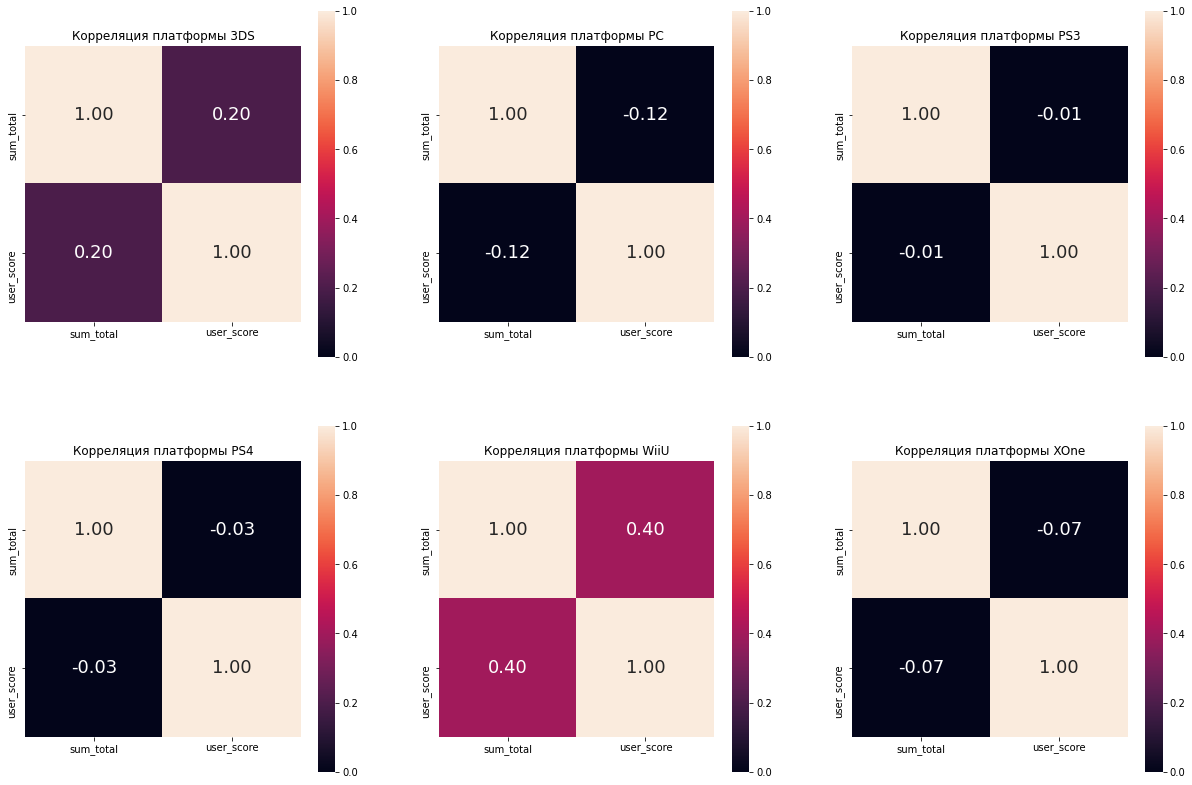

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(7*3,7*2))
for ax, (name_platform, data_slice) in zip(axes.ravel(), df_actuality_other.groupby(by='platform')):
    data_slice = data_slice.query('user_score > 0')
    sns.heatmap(data_slice[['sum_total', 'user_score']].corr(),
                ax=ax, annot=True, fmt='.2f', vmin=0,vmax=1, square=True,
                annot_kws={"size": 18})
    ax.set_title('Корреляция платформы ' + name_platform)

Можно сказать, что оценки пользователей практически не влияют на уровень продаж на платформах.

Выделяется лишь платформа WiiU, значение корреляции - 0.40.

Рассмотрим корреляцию оценки критиков.

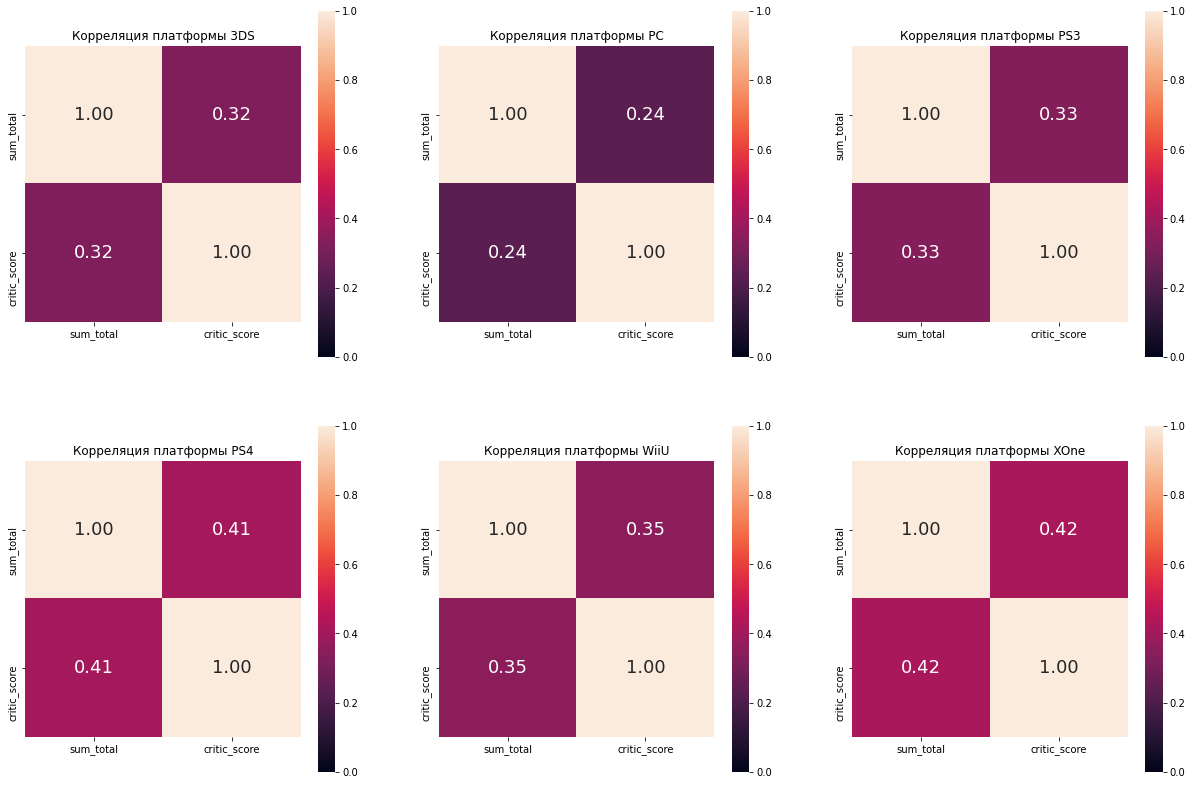

In [39]:
 fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(7*3,7*2))
for ax, (name_platform, data_slice) in zip(axes.ravel(), df_actuality_other.groupby(by='platform')):
    data_slice = data_slice.query('critic_score > 0')
    sns.heatmap(data_slice[['sum_total', 'critic_score']].corr(),
                ax=ax, annot=True, fmt='.2f', vmin=0,vmax=1, square=True,
                annot_kws={"size": 18})
    ax.set_title('Корреляция платформы ' + name_platform)

Значения корреляций у разных платформ находятся в диапазоне от 0.24 до 0.42.

Самая слабая корреляция между отзывами критиками и продажами на PC - 0.24, а самая сильная на XOne - 0.42.

**Вывод:**

Корреляция между оценками пользователей и уровнем продаж практически отсутствует, наблюдается слабая зависимость между уровнем продаж и оценками критиков.

На самой популярной платформе Х360 корреляция между продажами и оценкой критиков равняется 0.36.

4.6 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Сравним медианные значения данных о продажах в разных жанрах - так мы сможем невелировать влияние очень популярных игр в конкретном жанре на общую картину.

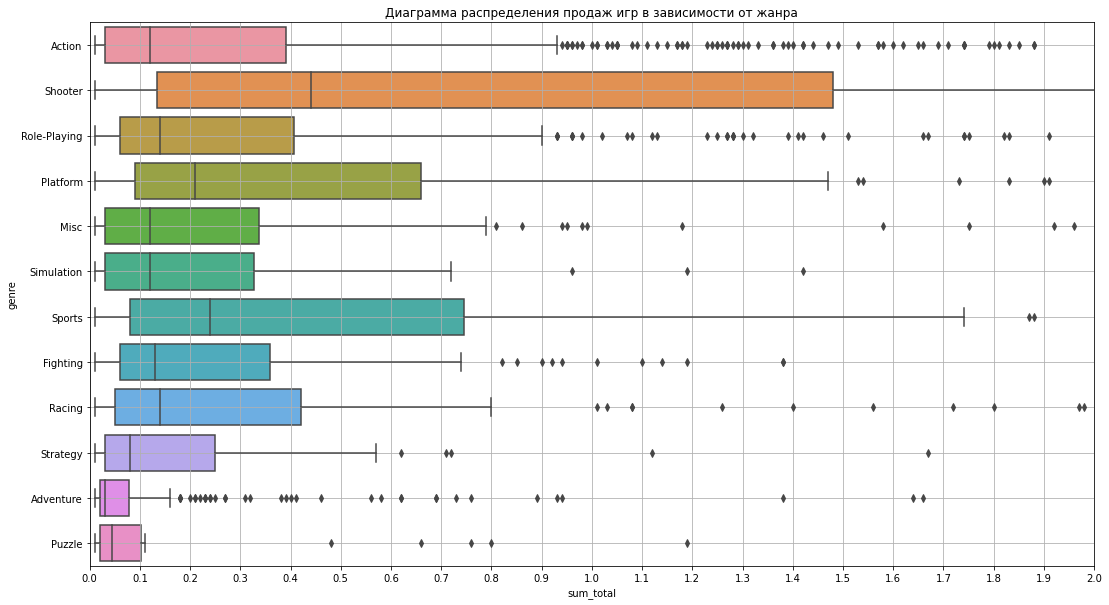

In [40]:
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(y="genre", x="sum_total", data=df_actuality, orient="h", ax=ax)
ax.grid()
ax.set_xlim(0,2.0)
ax.xaxis.set(ticks=np.arange(0,2.1,0.1));
ax.set_title('Диаграмма распределения продаж игр в зависимости от жанра')
pass

**Вывод:**

Самыми прибыльными жанрами являются Action, Shooter, Sports и Platform. А самыми менее прибыльными - Puzzle и Adventure, но стоит отметить, что на разработку игр в этом жанре нужно намного меньше средств.

## Составьте портрет пользователя каждого региона.

Напишем функцию топ-5, на входе будем задавать имя региона и название столбца. Так мы сможем сделать расчёт самых популярных значений.

In [41]:
regions = ['na_sales','eu_sales','jp_sales']
def get_top_5(region, by_col):
    df_temp = df_actuality.groupby(by=by_col)[region].agg('sum').sort_values(ascending=False).to_frame()
    top_5 = df_temp[:5].index
    df_temp.index = df_temp.index.where(df_temp.index.isin(top_5),'Other')
    return df_temp.groupby(by=df_temp.index)[region].agg('sum').sort_values(ascending=False)

4.1 Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [42]:
# Топ-5 платформ по суммарным продажам в каждом из регионов.
top_5_sales_by_regions = pd.concat([get_top_5(regions[0], 'platform'),
                                    get_top_5(regions[1], 'platform'),
                                    get_top_5(regions[2], 'platform')], axis=1)
top_5_sales_by_regions

,na_sales,eu_sales,jp_sales
platform,,,
X360,140.05,74.52,NaN
PS4,108.74,141.09,15.96
PS3,103.38,106.85,35.29
XOne,93.12,51.59,NaN
Other,90.37,90.12,19.49
3DS,55.31,42.64,87.79
PSV,NaN,NaN,21.04
WiiU,NaN,NaN,13.01


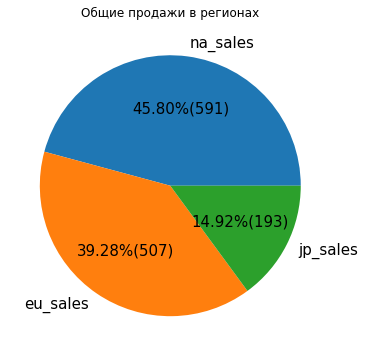

In [43]:
ax = top_5_sales_by_regions.sum().plot(
    kind='pie',
    autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*top_5_sales_by_regions.sum().sum()),
    textprops={'fontsize': 15},
    figsize=(6,6),
    title='Общие продажи в регионах')

ax.axis('off')

plt.show()

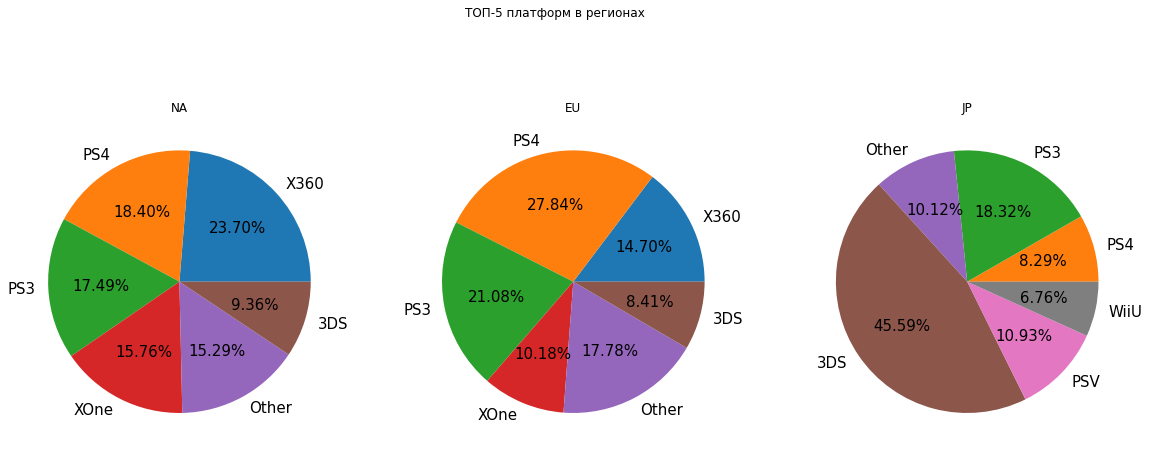

In [44]:
# Топ-5 платформ в регионах.
axes = top_5_sales_by_regions.plot.pie(subplots=True,
                                figsize=(20, 8),
                                autopct=lambda p: '{:.2f}%'.format(p) if p > 0 else '',
                                textprops={'fontsize': 15},
                                legend=False,
                                title='ТОП-5 платформ в регионах')
for id_,ax in enumerate(axes):
    ax.axis('off')
    ax.set_title(regions[id_].upper().split('_')[0])

**Вывод:** 

48.5% продаж приходится на жителей Северной Америки (591 млн. копий).
39.28% продаж приходится на Европейских жителей (507 млн. копий).
14.92% продаж приходится на Японких геймеров (193 млн. копий).

Видим, что в Японии самая популярная платформа - 3DS, 45.59% игроков пользуются именно ей. 
В Европе и Северной Америки популярность захватиили PS3, PS4, X360. 17.49%, 18.4% и 23.70% в Северной Америке и 21.08%, 27.84% и 14.7% в Европе.

PS3 пользуется популярностью во всех регионах:  
Северная Америка - 17.49%  
Европа - 21.08%  
Япония - 18.32%  

4.2 Самые популярные жанры (топ-5). Поясните разницу.

In [45]:
top_5_sales_by_genre = pd.concat([get_top_5(regions[0], 'genre'),
                                    get_top_5(regions[1], 'genre'),
                                    get_top_5(regions[2], 'genre')], axis=1)
top_5_sales_by_genre

,na_sales,eu_sales,jp_sales
genre,,,
Action,177.84,159.34,52.80
Shooter,144.77,113.47,NaN
Other,84.64,89.10,41.63
Sports,81.53,69.08,NaN
Role-Playing,64.00,48.53,65.44
Misc,38.19,NaN,12.86
Racing,NaN,27.29,NaN
Simulation,NaN,NaN,10.41
Fighting,NaN,NaN,9.44


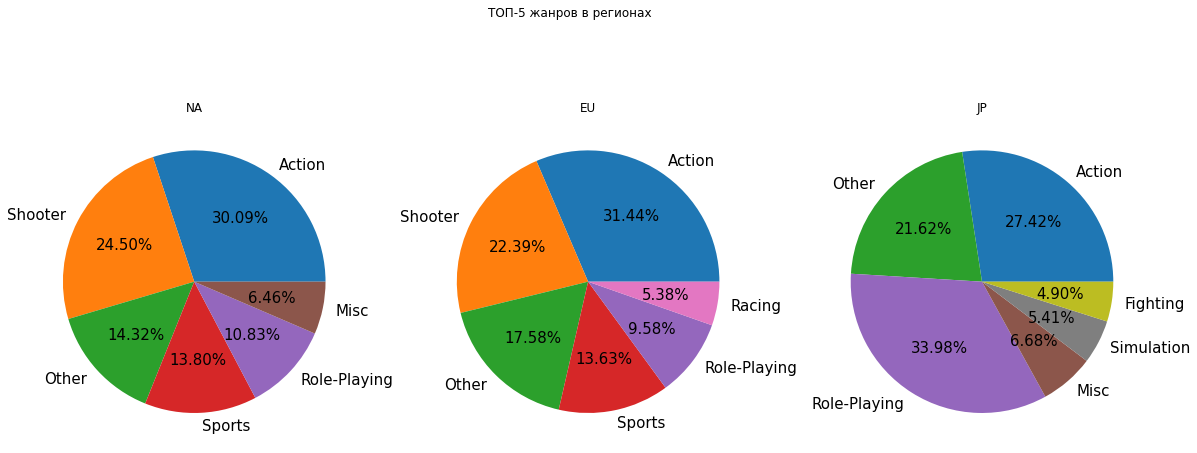

In [46]:
axes = top_5_sales_by_genre.plot.pie(subplots=True,
                                figsize=(20, 8),
                                autopct=lambda p: '{:.2f}%'.format(p) if p > 0 else '',
                                textprops={'fontsize': 15},
                                legend=False,
                                title='ТОП-5 жанров в регионах')
for id_,ax in enumerate(axes):
    ax.axis('off')
    ax.set_title(regions[id_].upper().split('_')[0])

**Вывод:**

Жанр, который имеет самую большую популярность во всех трёх регионах - Action (Сереверная Америка - 30,09%, Европа - 31.44%, Япония - 27.42%.

Топ жанров в Северной Америке без Action:

Shooter - 24.5%, Sports - 13.8%  

Топ жанров в Европе без Action:

Shooter - 22.39%, Sports - 13.63%

Топ жанр в Японии без Action:  

Role-Playing - 33.98%  

4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?

 Сгруппируем рейтинг ESRB по суммарным продажам d каждом регионе.

In [47]:
def get_ESRB(region, by_col):
    return df_actuality.groupby(by=by_col)[region].agg('sum').sort_values(ascending=False)

In [48]:
sales_by_ESRB = pd.concat([get_ESRB(regions[0], 'rating'),
                           get_ESRB(regions[1], 'rating'),
                           get_ESRB(regions[2], 'rating')], axis=1)
sales_by_ESRB

,na_sales,eu_sales,jp_sales
rating,,,
M,231.57,193.96,21.20
E,114.37,113.02,28.33
not_defined,103.31,91.50,108.84
E10+,75.70,55.37,8.19
T,66.02,52.96,26.02


M (Mature) - Для взрослых: Игры с этим рейтингом могут содержать интенсивное насилие, сексуальные сцены, сильную нецензурную лексику и другой контент, не подходящий для подростков. Они предназначены для взрослых игроков старше 17 лет.  

E (Everyone) - Для всех: Игры в этой категории подходят для широкого круга пользователей и не имеют ограничений по возрасту. Они могут содержать некоторое насилие или ненатуральные ситуации, но общий контент является безопасным для всех возрастов.  

E10+ (Everyone 10 and older) - Для всех от 10 лет и старше: Игры с этим рейтингом могут содержать немного более интенсивное насилие, мягкую нецензурную лексику и/или некоторые сексуальные намеки, но все еще предназначены для детей и подростков старше 10 лет.  

not_defined - рейтинг неизвестен.

T (Teen) - Подросткам: Игры в этой категории могут включать более интенсивное насилие, кровь, некоторые резкие выражения и непристойную лексику. Они предназначены для подростков от 13 лет и старше.  

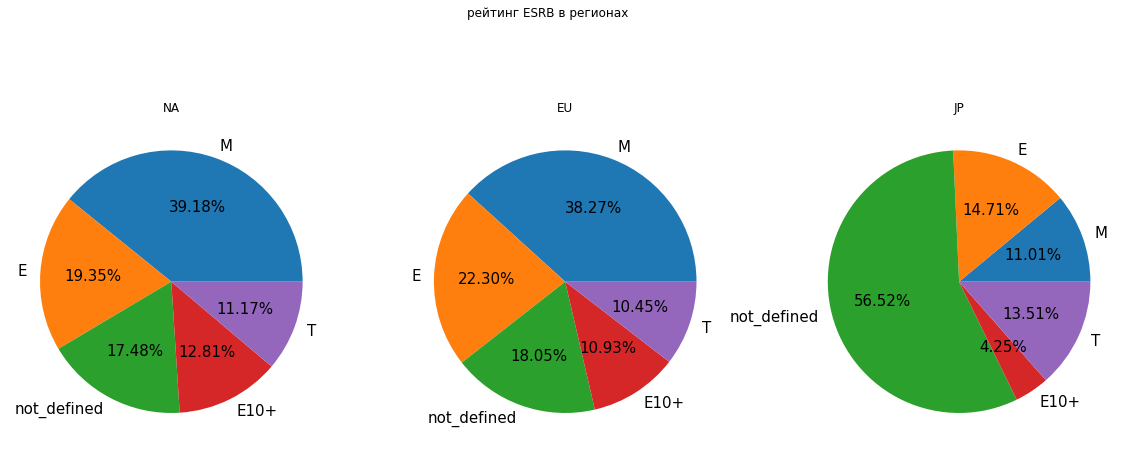

In [49]:
axes = sales_by_ESRB.plot.pie(subplots=True,
                                figsize=(20, 8),
                                autopct=lambda p: '{:.2f}%'.format(p) if p > 0 else '',
                                textprops={'fontsize': 15},
                                legend=False,
                                title='рейтинг ESRB в регионах')
for id_,ax in enumerate(axes):
    ax.axis('off')
    ax.set_title(regions[id_].upper().split('_')[0])

**Вывод:**

Игры для взрослых (M) игроков популярны в Северной Америке и Европе 38.18% и 38.27%. 
На втором месте игры для всех возрастов (E) - 19.35% в Северной Америке и 22.30% в Европе.

В Японии в значительной части игр рейтинг не определён (56.52%), вероятно, такой рейтинг мало используется в Японии.

**Общий вывод по анализу:**

Большинство геймеров живут в Северной Америке, на них приходится 48.5% продаж игр (примерно 591 млн. копий).
На втором месте - Европа, на европейских жителей приходится 39.28% продах игр (примерно 507 млн. копий).
На третьем месте - Япония, на японских геймеров приходится всего 14.92% всех проданных игр (примерно 193. млн. копий).

Топ платформ в Японии отличается от Северной Америки и Европы. В Японии популярна 3DS (46%), а в Европе и Северной Америке PS4 и X360 (примерно 42% всего рынка). PS3 практически одинаково популярна во всех регионах (примерно 18% пользователей каждого региона выбирают PS3).

Жанр, который имеет самую большую популярность во всех трёх регионах - Action (Сереверная Америка - 30,09%, Европа - 31.44%, Япония - 27.42%.

Топ жанров в Северной Америке без Action:

Shooter - 24.5%, Sports - 13.8%  

Топ жанров в Европе без Action:

Shooter - 22.39%, Sports - 13.63%

Топ жанр в Японии без Action:

Role-Playing - 33.98%

Role-Playing очень популярен в Японии, в Европе и Америке он составляет всего 10.83% и 9.58%. Европейским геймерам также нравится жанр Racing (5.28%), который отсутствует в других регионах, а Fighting и Simulation имеет место быть только в Японии (5.41% и 4.90%).

Игры для взрослых (M) игроков популярны в Северной Америке и Европе 38.18% и 38.27%. На втором месте игры для всех возрастов (E) - 19.35% в Северной Америке и 22.30% в Европе.

В Японии в значительной части игр рейтинг не определён (56.52%), удалось узнать, что в Японии такой рейтинг не используется, с этим связано большое количество игр без рейтинга.

## Проверьте гипотезы.

5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Подготовим данные, выделив необходимую информацию в два отдельных датасета.

In [50]:
df_actuality_PC = df_actuality[df_actuality['platform'] == 'PC'].query('user_score > 0')['user_score']
df_actuality_XOne= df_actuality[df_actuality['platform'] == 'XOne'].query('user_score > 0')['user_score']

Посмотрим сколько элементов в выборке, среднее (алгебраическая метрика), медиану (структурная метрика), дисперсию, СКО, минимальное и максимальное значение.

In [51]:
stat_fun = ['count', 'mean', 'median', 'var', 'std', 'min', 'max']
PC_vs_XOne_user_score_descr = pd.concat([df_actuality_PC.agg(stat_fun).transpose(),
df_actuality_XOne.agg(stat_fun).transpose()], axis=1)
PC_vs_XOne_user_score_descr.columns = ['пользовательский рейтинг PC', 'пользовательский рейтинг XOne']
PC_vs_XOne_user_score_descr.loc['Стандартная ошибка (E.S.E.)'] = PC_vs_XOne_user_score_descr.loc['std', :] / np.sqrt(
PC_vs_XOne_user_score_descr.loc['count', :])
PC_vs_XOne_user_score_descr

,пользовательский рейтинг PC,пользовательский рейтинг XOne
count,206.000000,182.000000
mean,6.428641,6.521429
median,6.800000,6.800000
var,2.770444,1.906997
std,1.664465,1.380941
min,1.400000,1.600000
max,9.300000,9.200000
Стандартная ошибка (E.S.E.),0.115969,0.102362


Количество элементов в выборках различается, средние показатели различаются незначительно.

Необходимо определить, является ли распределение выборок нормальным, в таких случаях удобно использовать гистограмму.

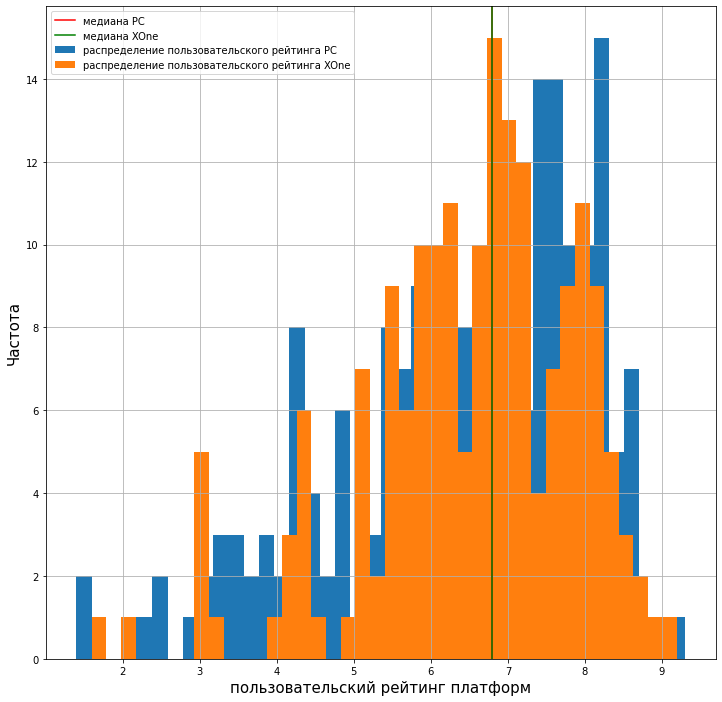

In [52]:
font_size = 15

fig, ax1 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(12, 12)

df_actuality_PC.plot.hist(ax=ax1, grid=True, bins=40, label='распределение пользовательского рейтинга PC')
ax1.axvline(df_actuality_PC.median(), color='r', label='медиана PC')

df_actuality_XOne.plot.hist(ax=ax1, grid=True, bins=40, label='распределение пользовательского рейтинга XOne')
ax1.set_xlabel('пользовательский рейтинг платформ', fontsize=font_size)
ax1.set_ylabel('Частота', fontsize=font_size)
ax1.axvline(df_actuality_XOne.median(), color='g', label='медиана XOne')
ax1.legend()
pass

Вид распределений у платформ PC и XONE нормальный, центры расположены примерно в 7.

Выставим уровень статистической значимости alpha равным 1% (так как размер выборок разный). 

Выдвинем нулевую гипотезу H0 о равенстве средних двух генеральных совокупностей - пользовательского рейтинга платформ Xbox One и PC, и противоположную гипотезу H1 о неравенстве средних.

In [53]:
alpha = .01 

results = st.ttest_ind(df_actuality_PC, df_actuality_XOne, equal_var=False)

print('p-значение:', results.pvalue, 'статистика разности:', results.statistic)

if results.pvalue > alpha:
    print("Не получилось отвергнуть нулевую гипотезу - среднее выборок равны.") 
else:
    print("Отвергаем нулевую гипотезу - среднее выборок не равны.")

p-значение: 0.5489537965134912 статистика разности: -0.5998585993590415
Не получилось отвергнуть нулевую гипотезу - среднее выборок равны.


**Вывод:**  

Был проведен t-тест о равенстве средних двух генеральных совокупностей - пользовательского рейтинга платформ Xbox One и PC с исходными выборками. Гипотеза H0 верна, средняя пользовательского рейтинга совпадает.

5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Аналогично предыдущей проверке подготовим данные:

In [54]:
df_actuality_action = df_actuality[df_actuality['genre'] == 'Action'].query('user_score > 0')['user_score']
df_actuality_sports = df_actuality[df_actuality['genre'] == 'Sports'].query('user_score > 0')['user_score']

In [55]:
stat_fun = ['count','mean','median','var', 'std','min','max']
action_vs_sports_user_score_descr = pd.concat([df_actuality_action.agg(stat_fun).transpose(),
           df_actuality_sports.agg(stat_fun).transpose()], axis=1)
action_vs_sports_user_score_descr.columns = ['пользовательский рейтинг жанра Actions', 'пользовательский рейтинг жанра Sports']
action_vs_sports_user_score_descr.loc['Стандартная ошибка (E.S.E.)'] = \
    action_vs_sports_user_score_descr.loc['std',:]/np.sqrt(action_vs_sports_user_score_descr.loc['count',:])
action_vs_sports_user_score_descr

,пользовательский рейтинг жанра Actions,пользовательский рейтинг жанра Sports
count,523.000000,194.000000
mean,6.825048,5.455670
median,7.100000,5.750000
var,1.889084,3.038543
std,1.374440,1.743142
min,1.600000,0.200000
max,9.100000,8.800000
Стандартная ошибка (E.S.E.),0.060100,0.125150


Количество элементов в выборках различается больше чем в 2 раза, средние показатели различаются незначительно.

Необходимо определить, является ли распределение выборок нормальным, в таких случаях удобно использовать гистограмму.

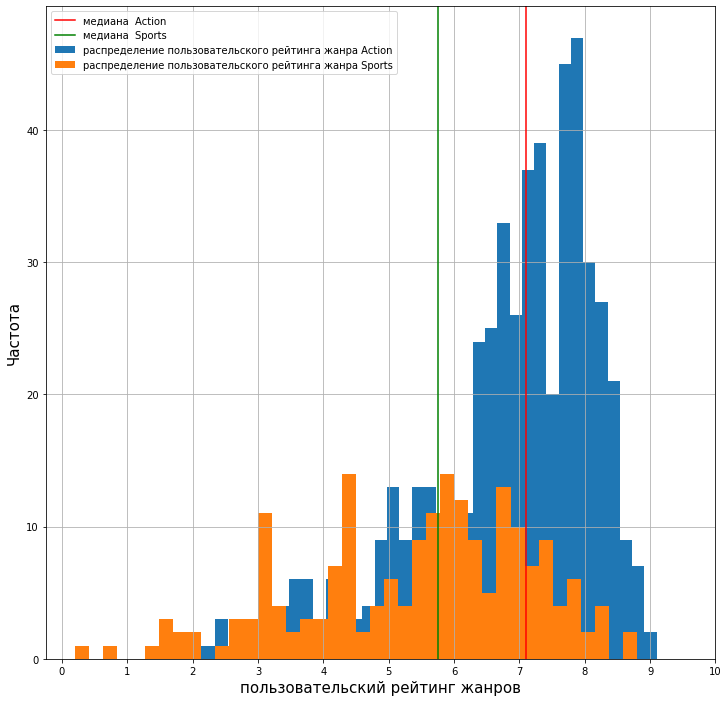

In [56]:
fornt_size = 15

fig, ax1 = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(12, 12)

df_actuality_action.plot.hist(ax=ax1, grid=True, bins=40, label='распределение пользовательского рейтинга жанра Action')
ax1.axvline(df_actuality_action.median(), color='r', label='медиана  Action')

df_actuality_sports.plot.hist(ax=ax1, grid=True, bins=40, label='распределение пользовательского рейтинга жанра Sports')
ax1.set_xlabel('пользовательский рейтинг жанров', fontsize=fornt_size)
ax1.set_ylabel('Частота', fontsize=fornt_size)
ax1.axvline(df_actuality_sports.median(), color='g', label='медиана  Sports')
ax1.legend()
ax1.xaxis.set(ticks=range(0,11,1))
pass

Распределения похожи на нормальные, на представленных гистограммах видна разница в размераз выборок.

Выдвинем нулевую гипотезу H0 о равенстве средних двух генеральных совокупностей - пользовательского рейтинга жанров Actions и Sports, и противоположную гипотезу H1 соотвественно что не равны.

In [57]:
alpha = .01 

results = st.ttest_ind(df_actuality_action, df_actuality_sports, equal_var=False)

print('p-значение:', results.pvalue, 'статистика разности:', results.statistic)

if results.pvalue > alpha:
    print("Не получилось отвергнуть нулевую гипотезу - среднее выборок равны.") 
else:
    print("Отвергаем нулевую гипотезу - среднее выборок не равны.")

p-значение: 5.989458066467418e-20 статистика разности: 9.863487132322389
Отвергаем нулевую гипотезу - среднее выборок не равны.


**Вывод:**

При заниженном пороге уровня значимости гипотеза H0 отвергается. Средняя пользовательского рейтинга жанров Action и Sports различается, у  жанра Action она на 1.45 выше. Стоит отметить, что размер выборок отличался почти в два раза.

## Общий вывод.


В ходе предобработки датасета games.csv названия столбцов были приведены к нижнему регистру.  

Был изменён тип некоторых данных: 
-Столбец user_score приведен к числовому типу float64, так как он содержит дробные числа. 
-Столбец critic_score приведен к числовому типу int, так как данные в нём целочисленные. 
-Cтолбец year_of_release приведен к числовому типу int, так как данные в нём целочисленные. 

Проведена работа с пропусками:
-Пропуски в столбце name были удалены, в связи с отсутствием данным в этих строках.
-Пропуски в столбце year_of_release были заменены на -1, чтобы у нас была возможность не включать их в исследуемый диапозон.
-В столбцах critic_score и user_score значения np.NaN заменены на -1, логика аналогична столбцу year_of_release.
-Пропуски в столбце rating были заменены на значение "not_defined", что говорит о том, что рейтинг не определён.

Неявных и явных дубликатов в данных не обнаружено. Были посчитаны суммарные продажи во всех регионах и записаны в столбец sum_total.

Исследовательский анализ:

Самые популярные платформы: DS, PS, PS2, PS3, Wii, X360 и XB. Для DS и PS выпущено более 2000 игр.

В среднем за 5 лет на рынке появляются новые платформы, а живут они около 10 лет, потом исчезают примерно за 5 лет. Но это в среднем, разброс значений достаточно велик ососбеннно у времени жизни. На основе вычисленного времени появления платформ на рынке выбран актуальный период с 2012 по 2016 г.

На момент 2016 года к наиболее прибыльным платформам можно отнести PS4, XOne, 3DS. К 2016 году продажи многих платформ сильно упали, что говорит о том что они завершают свой жизненый цикл. Несколько новых платформ появилось в 2013 году. 

Уровень дохода платформы PC особо не меняется с течением времени.

Самыми продаваемыми платформами во всех регионах были PS4, X360, XOne и Wii.

Корреляция между оценками пользователей и уровнем продаж практически отсутствует, наблюдается слабая зависимость между уровнем продаж и оценками критиков.

На самой популярной платформе Х360 корреляция между продажами и оценкой критиков равняется 0.36.

Большинство геймеров живут в Северной Америке, на них приходится 48.5% продаж игр (примерно 591 млн. копий). На втором месте - Европа, на европейских жителей приходится 39.28% продах игр (примерно 507 млн. копий). На третьем месте - Япония, на японских геймеров приходится всего 14.92% всех проданных игр (примерно 193. млн. копий).

Топ платформ в Японии отличается от Северной Америки и Европы. В Японии популярна 3DS (46%), а в Европе и Северной Америке PS4 и X360 (примерно 42% всего рынка). PS3 практически одинаково популярна во всех регионах (примерно 18% пользователей каждого региона выбирают PS3).

Игры для взрослых (M) игроков популярны в Северной Америке и Европе 38.18% и 38.27%. На втором месте игры для всех возрастов (E) - 19.35% в Северной Америке и 22.30% в Европе.

В Японии в значительной части игр рейтинг не определён (56.52%), удалось узнать, что в Японии такой рейтинг не используется, с этим связано большое количество игр без рейтинга.

По результатам статистических гипотез значения пользовательского рейтинга платформ Xbox One и PC совпадают, а жанров Action и Sports различаются, у  жанра Action она на 1.45 выше.